In [1]:
# Importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, cohen_kappa_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import tree
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier


In [3]:
#Importing data
df= pd.read_excel(r'customer_churn_large_dataset.xlsx')

In [4]:
#To Display all the rows and columns of table
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None) 

In [5]:
#Keeping copy of file for future 
df1= df.copy()

In [6]:
## Data Cleaning and Preprocessing

In [7]:
#To display top 5 rows of the table
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [8]:
#To display number of rows and columns
df.shape

(100000, 9)

In [9]:
#To display columns, data types, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [10]:
#To display data types of columns
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [11]:
#To display list of columns
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [12]:
#To display number of missing values and treat them
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [13]:
#To display number of duplicate values
df.duplicated().sum()

0

In [14]:
#To display columns that are numeric and categorical
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Name', 'Gender', 'Location'], dtype='object')
Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn'],
      dtype='object')


In [15]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [16]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [17]:
# EDA - Exploratory Data Analysis

In [18]:
#To display basic statistical values for numeric columns
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [19]:
os.chdir('F:\Internshala tasks\Sunbase\Column Visualization')

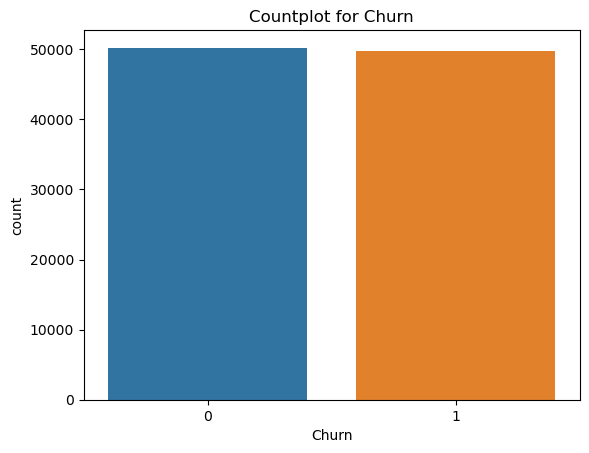

In [20]:
#To display countplot of Churn variable
sns.countplot(x=df['Churn'])
plt.title('Countplot for Churn')
plt.savefig('Churn.png')
plt.show()

In [21]:
# EDA of categorical columns

In [22]:
cat_cols

Index(['Name', 'Gender', 'Location'], dtype='object')

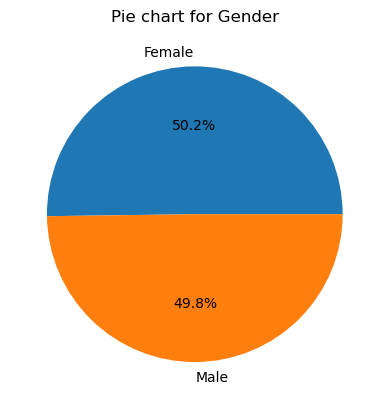

In [23]:
# Pie chart for Occupation

count = df['Gender'].value_counts()
labels = count.index.tolist()
sizes = count.values.tolist()
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f'Pie chart for Gender')
plt.savefig('Gender.png')
plt.show()

In [24]:
# Inference:
# Distribution of male and female is almost equal.

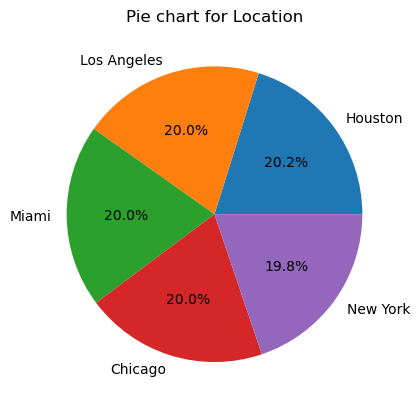

In [25]:
# Pie chart for Location

count = df['Location'].value_counts()
labels = count.index.tolist()
sizes = count.values.tolist()
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f'Pie chart for Location')
plt.savefig('Location.png')
plt.show()

In [26]:
# Inference:
# All the customers are almost evenly distributed from all 5 locations.

In [27]:
# EDA of numeric columns

In [28]:
num_cols

Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn'],
      dtype='object')

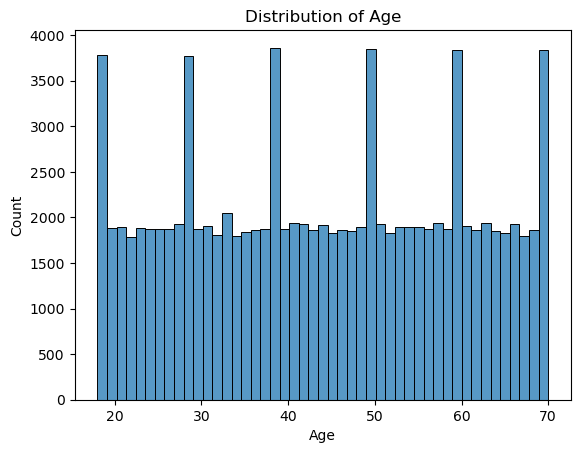

In [29]:
# To plot histogram for Age
sns.histplot(x=df['Age'], palette="light:b")
plt.title(f'Distribution of Age')
plt.savefig('Age.png')
plt.show()

In [30]:
# Inference:
# Distribution is almost equal across age except at 19,29,39,49,59,69.

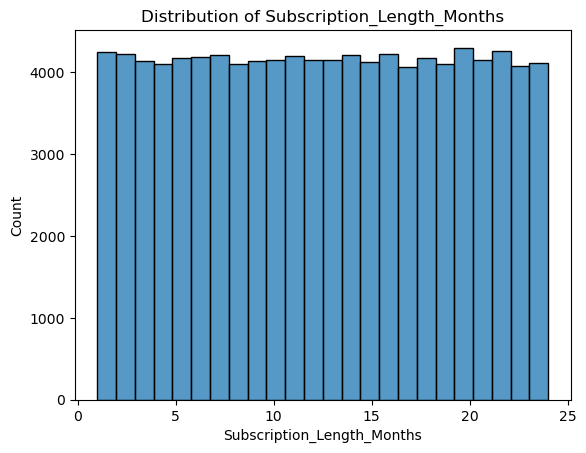

In [31]:
# To plot histogram for Subscription_Length_Months
sns.histplot(x=df['Subscription_Length_Months'], palette="light:b", bins=24)
plt.title(f'Distribution of Subscription_Length_Months')
plt.savefig('Subscription_Length_Months.png')
plt.show()

In [32]:
# Inference:
# Subscription length is even across all months except a bit higher at 19 and 22 months.

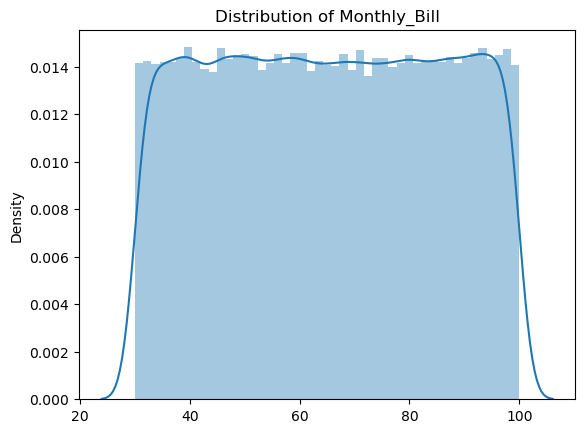

In [33]:
# To plot histogram for Monthly_Bill
sns.distplot(x=df['Monthly_Bill'])
plt.title(f'Distribution of Monthly_Bill')
plt.savefig('Monthly_Bill.png')
plt.show()

In [34]:
df['Monthly_Bill'].value_counts()

84.37     34
61.99     29
38.26     28
66.38     28
56.17     28
92.46     28
97.24     28
49.93     28
71.28     27
80.35     27
40.26     27
36.12     27
91.58     27
40.53     27
92.67     27
75.98     26
46.01     26
40.62     26
79.38     26
94.15     26
93.72     26
96.62     26
75.64     26
41.65     26
42.24     26
35.37     26
73.75     26
31.16     25
59.30     25
55.92     25
97.62     25
92.34     25
91.18     25
35.13     25
77.23     25
80.36     25
94.92     25
64.30     25
42.29     25
32.30     25
45.98     25
78.64     24
37.34     24
95.47     24
91.28     24
90.87     24
63.51     24
67.29     24
34.67     24
84.97     24
67.44     24
47.97     24
31.23     24
46.62     24
39.85     24
60.79     24
92.96     24
33.06     24
67.60     24
61.11     24
48.21     24
57.28     24
50.29     24
63.95     24
69.95     24
45.77     24
73.94     24
55.90     24
75.92     24
31.17     24
93.10     24
98.13     24
52.89     24
66.63     24
87.43     24
54.00     24
57.76     24

In [35]:
# Inference:
# Monthly bill is distributed almost evenly between 30 and 100.

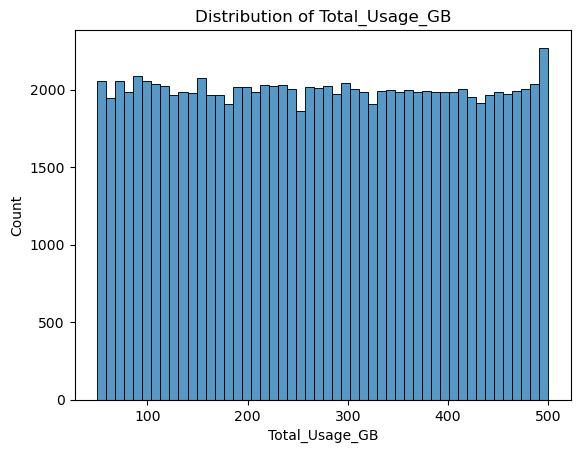

In [36]:
# To plot histogram for Total_Usage_GB
sns.histplot(x=df['Total_Usage_GB'], palette="light:b", bins=50)
plt.title(f'Distribution of Total_Usage_GB')
plt.savefig('Total_Usage_GB.png')
plt.show()

In [37]:
# Inference:
# Total usage is almost evenly distributed with spike at 500GB and lowest point at 250GB.

In [38]:
# Bivariate Analysis

In [39]:
print(cat_cols)
print(num_cols)

Index(['Name', 'Gender', 'Location'], dtype='object')
Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn'],
      dtype='object')


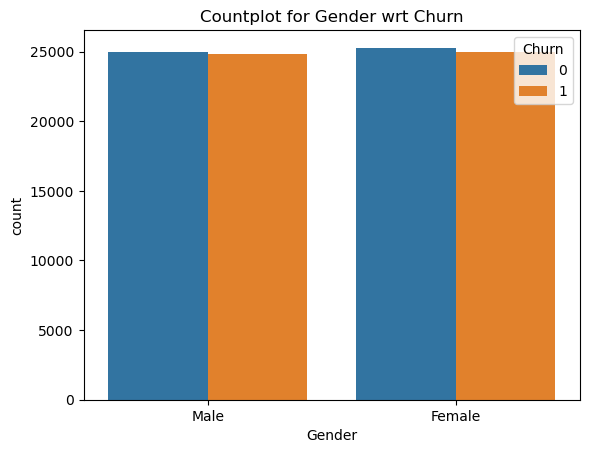

In [40]:
# Distribution of Gender with respect to Churn
sns.countplot(x=df['Gender'],hue=df['Churn'])
plt.title(f'Countplot for Gender wrt Churn')
plt.savefig('GenderVSChurn.png')
plt.show()

In [41]:
# Inference:
# The chrun rate is almost same for male and female customers.

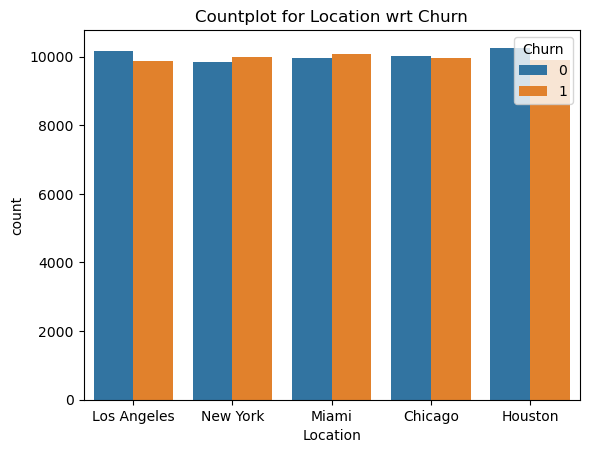

In [42]:
# Distribution of Gender with respect to Churn
sns.countplot(x=df['Location'],hue=df['Churn'])
plt.title(f'Countplot for Location wrt Churn')
plt.savefig('LocationVSChurn.png')
plt.show()

In [43]:
# Inference:
# If the customer is from NewYork or Miami, the chances of churn are slightly higher.

In [44]:
num_cols

Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn'],
      dtype='object')

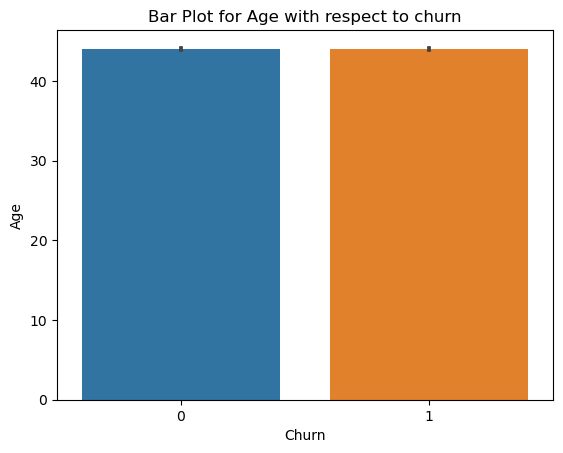

In [45]:
sns.barplot(x=df["Churn"], y=df["Age"])
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Bar Plot for Age with respect to churn')
plt.show()

In [46]:
# Inference:
# Age doesn't have much relation with churn.

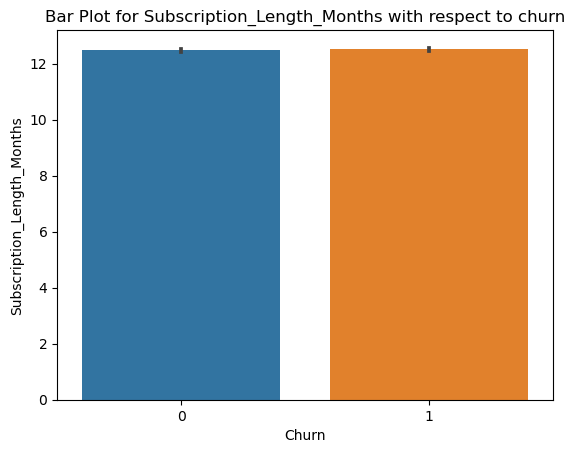

In [47]:
sns.barplot(x=df["Churn"], y=df["Subscription_Length_Months"])
plt.xlabel('Churn')
plt.ylabel('Subscription_Length_Months')
plt.title('Bar Plot for Subscription_Length_Months with respect to churn')
plt.show()

In [48]:
# Inference:
# Subscription Length doesn't have much relation with churn.

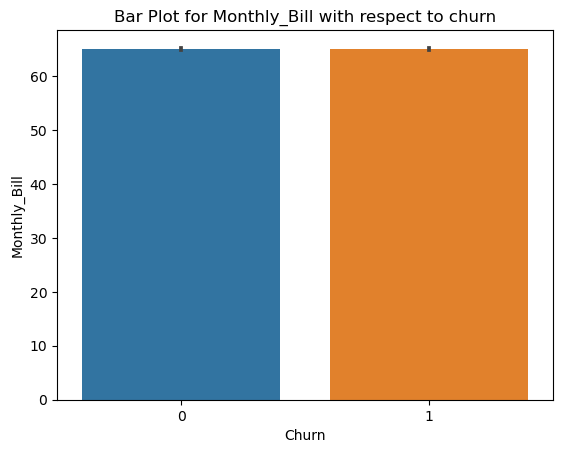

In [49]:
sns.barplot(x=df["Churn"], y=df["Monthly_Bill"])
plt.xlabel('Churn')
plt.ylabel('Monthly_Bill')
plt.title('Bar Plot for Monthly_Bill with respect to churn')
plt.show()

In [50]:
# Inference:
# Monthly bill doesn't have much relation with churn.

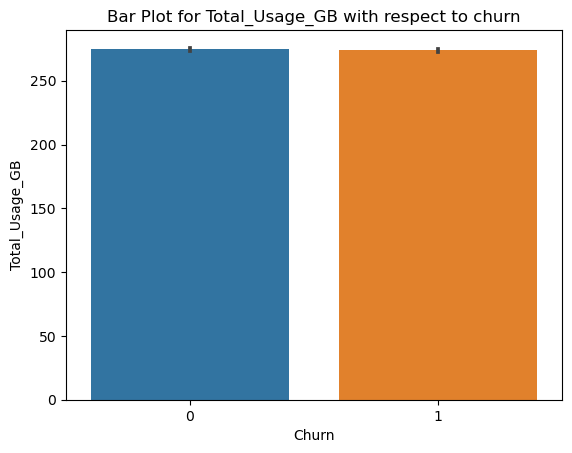

In [51]:
sns.barplot(x=df["Churn"], y=df["Total_Usage_GB"])
plt.xlabel('Churn')
plt.ylabel('Total_Usage_GB')
plt.title('Bar Plot for Total_Usage_GB with respect to churn')
plt.show()

In [52]:
# Inference:
# Total Internet usage doesn't have much relation with churn.

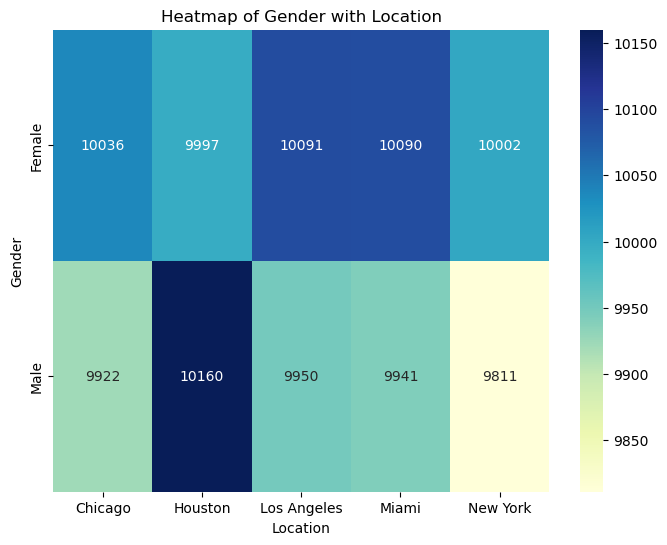

In [53]:
# To plot table to compare Gender with Location
plt.figure(figsize=(8, 6))
crosstab = pd.crosstab(df['Gender'], df['Location'])
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Location')
plt.ylabel('Gender')
plt.title('Heatmap of Gender with Location')
plt.savefig('GenderVSLocation.png')
plt.show()

In [54]:
# Inference:
# Maximum customers are male and from Houston state.
# Least customers are male and from New York state.

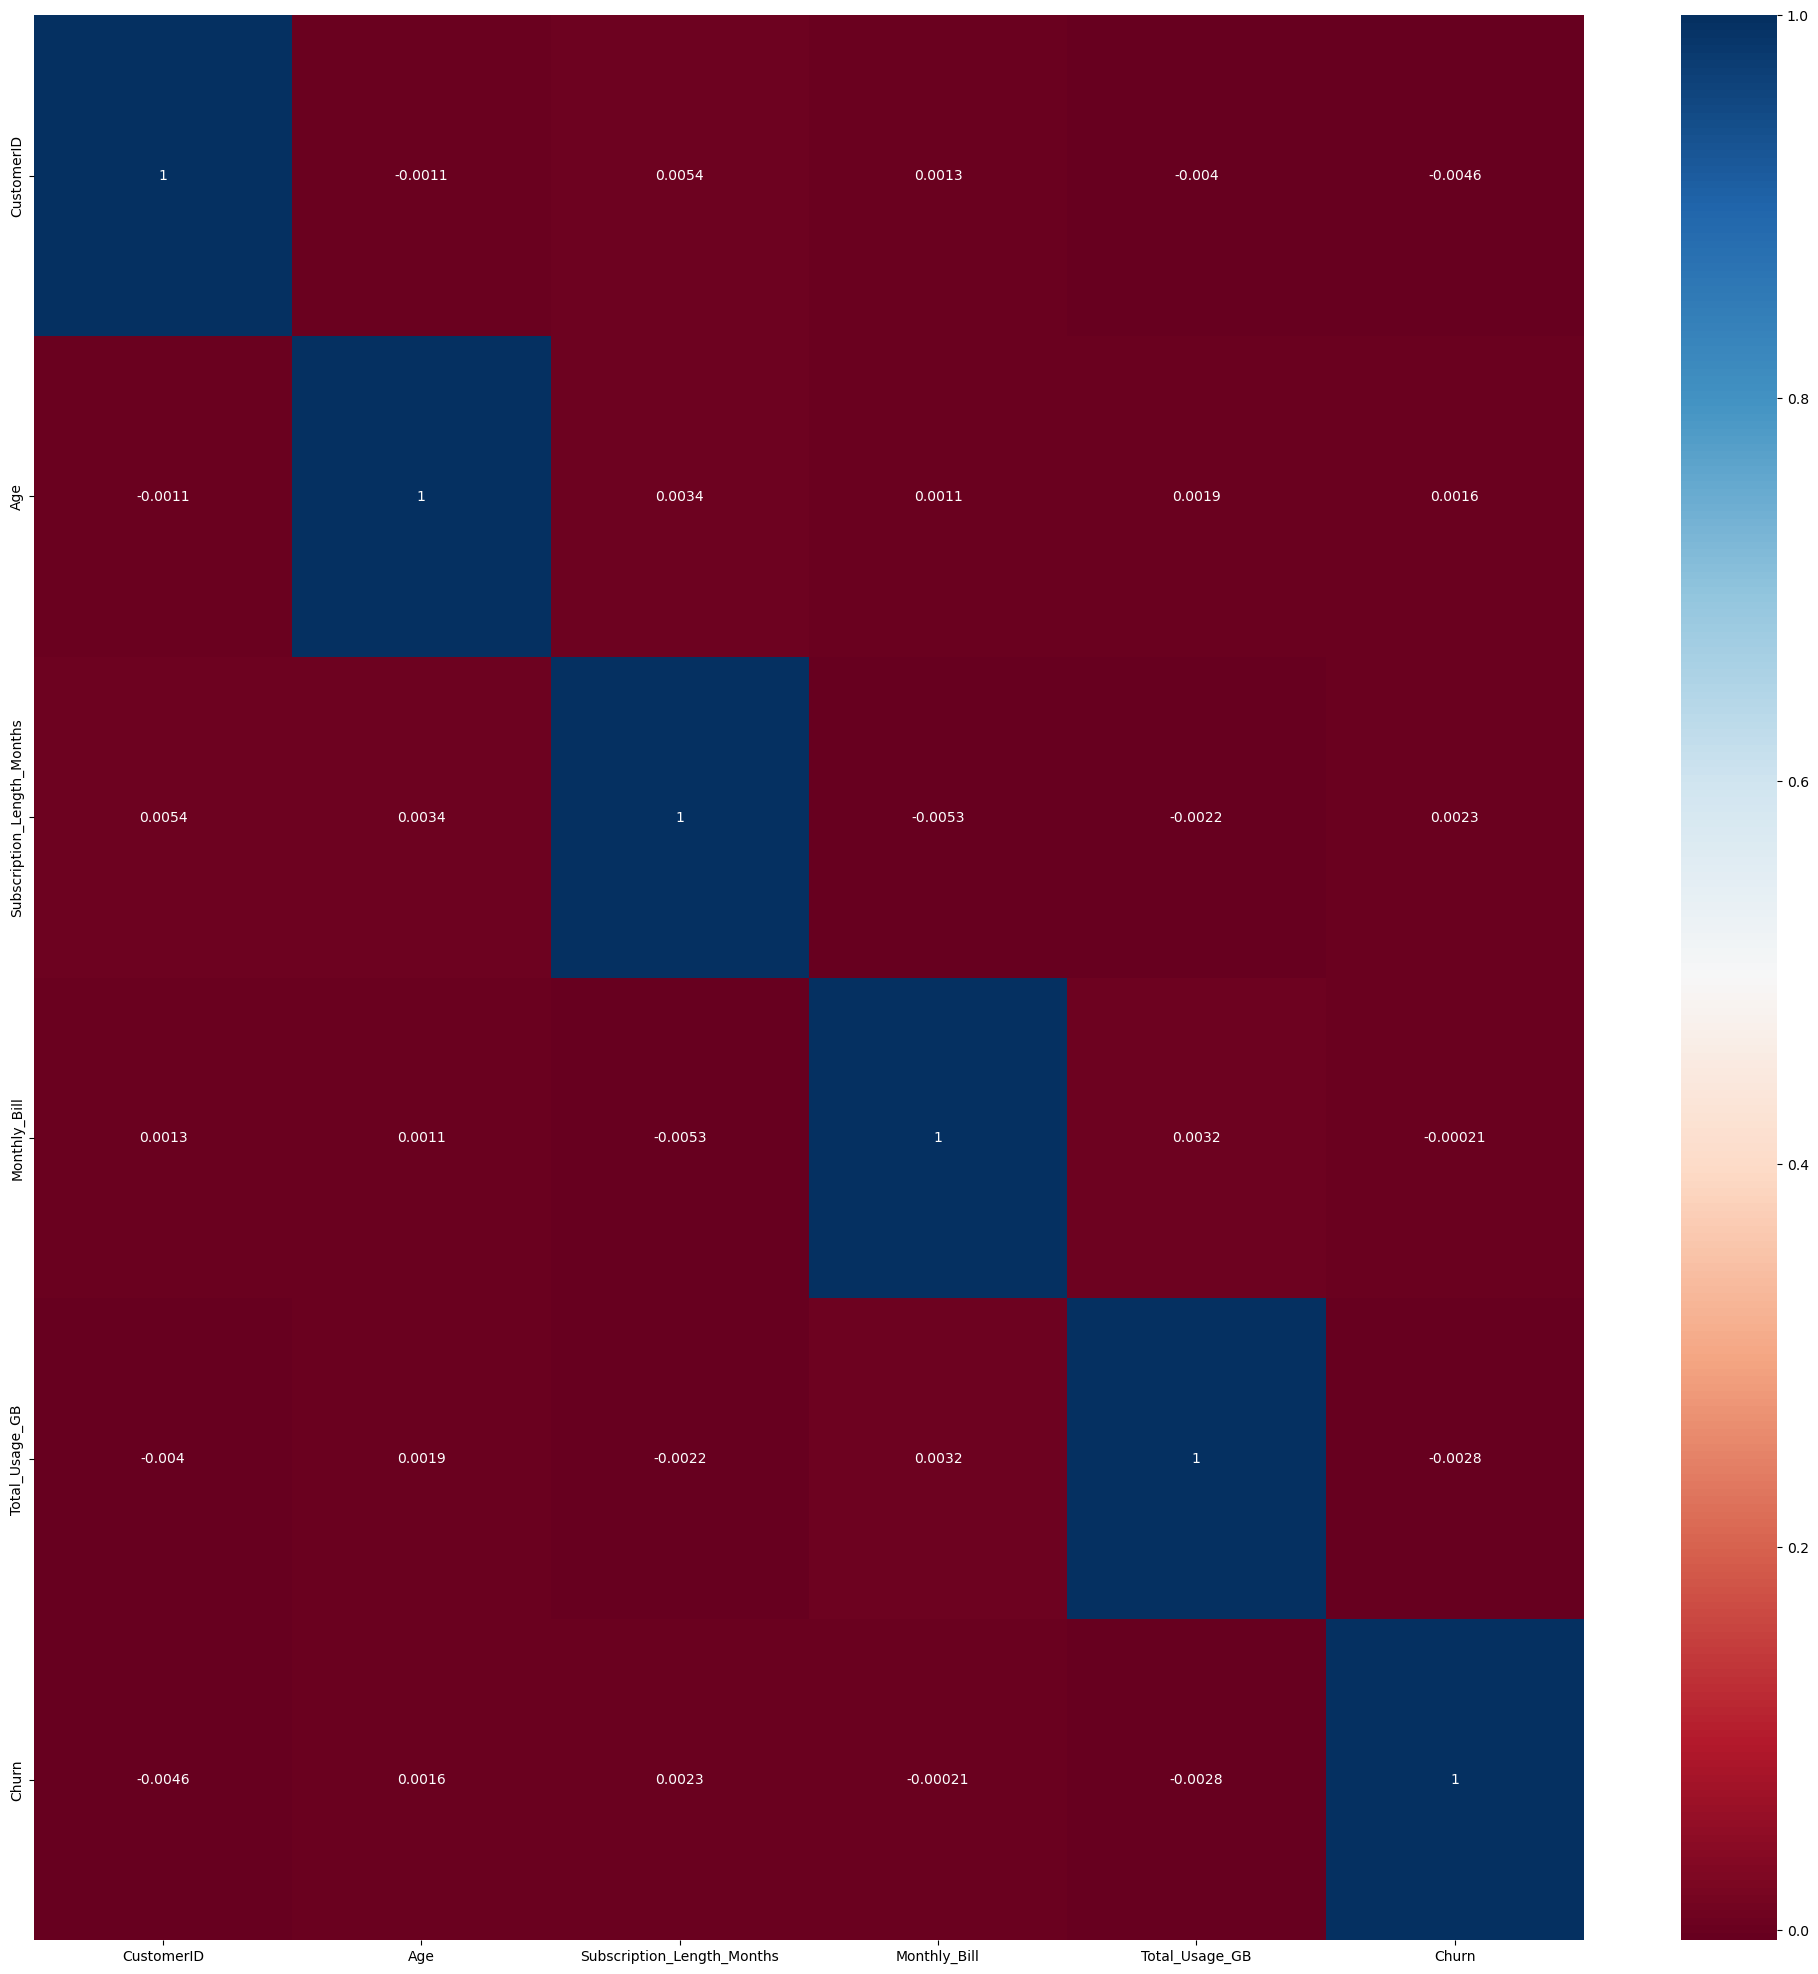

In [55]:
#To display correlation between different numeric columns
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.savefig('CorrelationMatrix.png')
plt.show()

In [56]:
# Inference:
# All the variables have less than 1% relation with churn rate.
# We need to ask client for more customer information in order to create a good performing model.

In [57]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [58]:
# Removing columns that will not affect the model
df.drop(['CustomerID', 'Name'],axis=1,inplace=True)

In [59]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Gender', 'Location'], dtype='object')
Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')


In [60]:
# Encoding categorical columns Gender and location.

df = pd.get_dummies(df, columns = ['Gender'],prefix = 'Gender_')
df = pd.get_dummies(df, columns = ['Location'],prefix = 'Location_')

In [61]:
# Model building

In [62]:
# Creating Function to evalute the model performance

In [63]:
def eval_model(model,x_train,x_test,y_train,y_test, save=True):
    global train_score, test_score, precision, recall, acc, f1

    modelname= type(model).__name__
    model.fit(x_train,y_train)
    train_score = round(model.score(x_train,y_train),2)
    test_score = round(model.score(x_test,y_test),2)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print('\nTraining Score is:', round(train_score,4)*100, '%')
    print('Testing Score is:', round(test_score,4)*100, '%\n')

    print('precision Score is:', round(precision,4))
    print('Recall Score is:', round(recall,4))
    print('F1 Score is:', round(f1,4))

    cm = confusion_matrix(y_test,y_pred)
    print('\nConfusion Matrix is\n', cm)

    print('\nPredictions:\n',y_pred)
    print(classification_report(y_test,y_pred))

    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="RdBu", cbar=False)
    if save:
        save_cm= f'{modelname}confusionMatrix.png'
        plt.savefig(save_cm)
    else:
        plt.show()

In [64]:
score_card = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score', 'Precision Score',
                                   'Recall Score', 'f1-score'])

def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name, 'Train Score': train_score,
                                    'Test Score': test_score, 'Precision Score': precision,
                                    'Recall Score': recall, 'f1-score': f1}, ignore_index = True)
    return(score_card)

In [65]:
#Select the Dependent and Independent Features
x = df.drop('Churn',axis=1)
y = df['Churn']
print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(100000, 11) (100000,)


In [66]:
#Split the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1000)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 11)
(30000, 11)
(70000,)
(30000,)


In [67]:
# Logistic Regression


Training Score is: 51.0 %
Testing Score is: 50.0 %

precision Score is: 0.501
Recall Score is: 0.3375
F1 Score is: 0.4033

Confusion Matrix is
 [[9978 5037]
 [9927 5058]]

Predictions:
 [1 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.50      0.66      0.57     15015
           1       0.50      0.34      0.40     14985

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



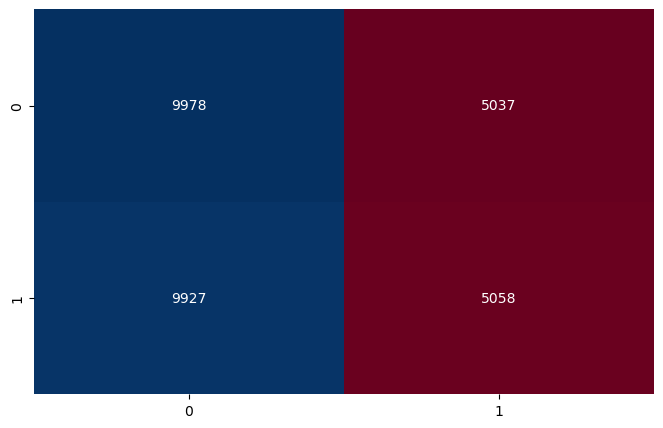

In [68]:
lr = LogisticRegression(max_iter=10000)
eval_model(lr,x_train,x_test,y_train,y_test)

In [69]:
update_score_card(model_name = 'Logistic Regression')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.50104,0.337538,0.403349


In [70]:
#### Logistic Regression (using SGD)


Training Score is: 50.0 %
Testing Score is: 50.0 %

precision Score is: 0.4995
Recall Score is: 1.0
F1 Score is: 0.6662

Confusion Matrix is
 [[    0 15015]
 [    0 14985]]

Predictions:
 [1 1 1 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15015
           1       0.50      1.00      0.67     14985

    accuracy                           0.50     30000
   macro avg       0.25      0.50      0.33     30000
weighted avg       0.25      0.50      0.33     30000



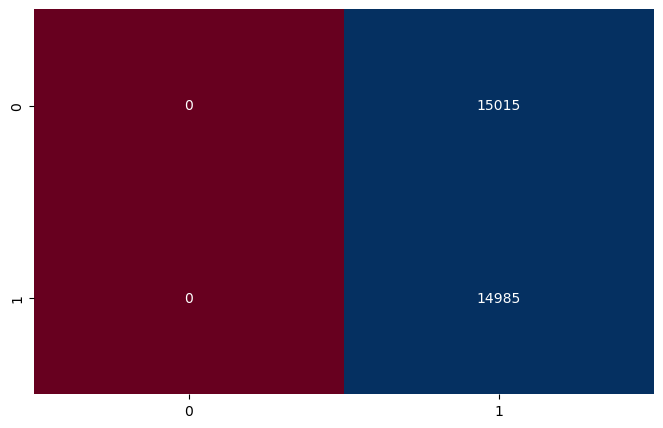

In [71]:
lr_SGD = SGDClassifier(loss = 'log', random_state = 10)
eval_model(lr_SGD,x_train,x_test,y_train,y_test)

In [72]:
update_score_card(model_name = 'Logistic Regression using SGD')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.50104,0.337538,0.403349
1,Logistic Regression using SGD,0.50,0.5,0.49950,1.000000,0.666222


In [73]:
# Decision Tree Classifier


Training Score is: 100.0 %
Testing Score is: 50.0 %

precision Score is: 0.4967
Recall Score is: 0.492
F1 Score is: 0.4944

Confusion Matrix is
 [[7545 7470]
 [7612 7373]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15015
           1       0.50      0.49      0.49     14985

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



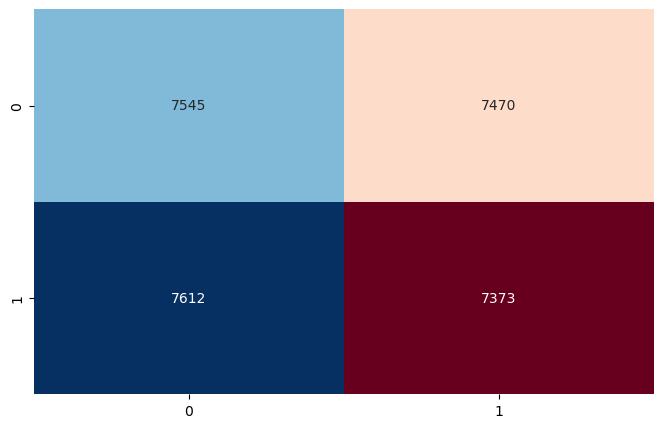

In [74]:
dt1 = DecisionTreeClassifier(criterion='gini')
eval_model(dt1,x_train,x_test,y_train,y_test)

In [75]:
update_score_card(model_name = 'Decision Tree Classifier')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.501040,0.337538,0.403349
1,Logistic Regression using SGD,0.50,0.5,0.499500,1.000000,0.666222
2,Decision Tree Classifier,1.00,0.5,0.496732,0.492025,0.494368


In [76]:
# Decision Tree with Pruning

In [77]:
hparams = {'criterion':['gini','entropy','log_loss'],
          'max_depth':[8,9,10,11,12,14],
          'min_samples_split':[8,10,12,14,15,16,20]}

dt_rs = DecisionTreeClassifier()
rscv = RandomizedSearchCV(dt_rs,param_distributions=hparams,scoring='accuracy',n_iter=20)
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [8, 9, 10, 11, 12, 14],
                                        'min_samples_split': [8, 10, 12, 14, 15,
                                                              16, 20]},
                   scoring='accuracy')

In [78]:
print(rscv.best_params_)
print(rscv.best_estimator_)
print(rscv.best_index_)
print(rscv.best_score_)

{'min_samples_split': 16, 'max_depth': 9, 'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=16)
3
0.5029


In [79]:
tuned_paramaters = [ {'criterion':['gini'],'max_depth':[7,8,9],
'min_samples_split':[18,20,22]}]

dt_CV= DecisionTreeClassifier(random_state = 10)

grid = GridSearchCV(estimator = dt_CV, param_grid = tuned_paramaters, cv = 10)

dt_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', dt_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 18} 




Training Score is: 52.0 %
Testing Score is: 50.0 %

precision Score is: 0.5025
Recall Score is: 0.5946
F1 Score is: 0.5447

Confusion Matrix is
 [[6194 8821]
 [6075 8910]]

Predictions:
 [0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.50      0.41      0.45     15015
           1       0.50      0.59      0.54     14985

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



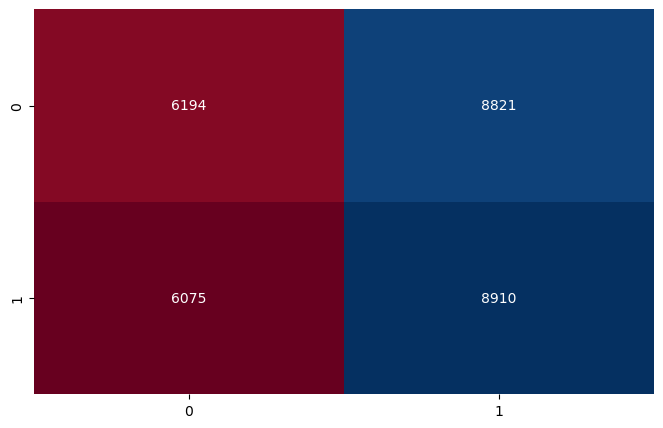

In [80]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=8, min_samples_split=18)
eval_model(dt2,x_train,x_test,y_train,y_test)

In [81]:
update_score_card(model_name = 'Decision Tree with Pruning')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.501040,0.337538,0.403349
1,Logistic Regression using SGD,0.50,0.5,0.499500,1.000000,0.666222
2,Decision Tree Classifier,1.00,0.5,0.496732,0.492025,0.494368
3,Decision Tree with Pruning,0.52,0.5,0.502510,0.594595,0.544688


In [82]:
# Random Forest Classifier


Training Score is: 100.0 %
Testing Score is: 50.0 %

precision Score is: 0.5019
Recall Score is: 0.4775
F1 Score is: 0.4894

Confusion Matrix is
 [[7915 7100]
 [7830 7155]]

Predictions:
 [1 1 0 ... 1 1 0]
              precision    recall  f1-score   support

           0       0.50      0.53      0.51     15015
           1       0.50      0.48      0.49     14985

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



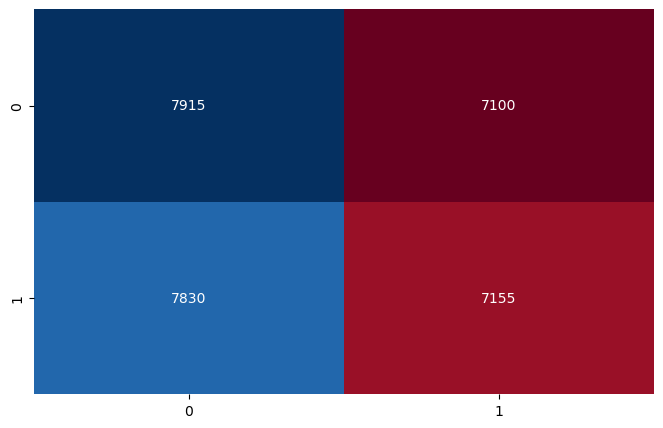

In [83]:
rf = RandomForestClassifier(n_estimators=100, random_state=10)
eval_model(rf,x_train,x_test,y_train,y_test)

In [84]:
update_score_card(model_name = 'Random Forest')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.501040,0.337538,0.403349
1,Logistic Regression using SGD,0.50,0.5,0.499500,1.000000,0.666222
2,Decision Tree Classifier,1.00,0.5,0.496732,0.492025,0.494368
3,Decision Tree with Pruning,0.52,0.5,0.502510,0.594595,0.544688
4,Random Forest,1.00,0.5,0.501929,0.477477,0.489398


In [85]:
# Random Forest with Tuning

In [86]:
hparams = {'n_estimators': [180, 200, 220], 'min_samples_split': [10, 15, 20],
           'max_depth': [8, 10, 12], 'min_samples_leaf': [10, 15, 20],
           'max_leaf_nodes': [80, 100, 120] }

rf_rs = RandomForestClassifier()
rscv = RandomizedSearchCV(rf_rs,param_distributions=hparams,scoring='accuracy',n_iter=20)
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [8, 10, 12],
                                        'max_leaf_nodes': [80, 100, 120],
                                        'min_samples_leaf': [10, 15, 20],
                                        'min_samples_split': [10, 15, 20],
                                        'n_estimators': [180, 200, 220]},
                   scoring='accuracy')

In [87]:
print(rscv.best_params_)
print(rscv.best_estimator_)
print(rscv.best_index_)
print(rscv.best_score_)

{'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_leaf_nodes': 100, 'max_depth': 10}
RandomForestClassifier(max_depth=10, max_leaf_nodes=100, min_samples_leaf=20,
                       min_samples_split=20, n_estimators=200)
12
0.5049



Training Score is: 59.0 %
Testing Score is: 50.0 %

precision Score is: 0.5028
Recall Score is: 0.3365
F1 Score is: 0.4032

Confusion Matrix is
 [[10030  4985]
 [ 9943  5042]]

Predictions:
 [1 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57     15015
           1       0.50      0.34      0.40     14985

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



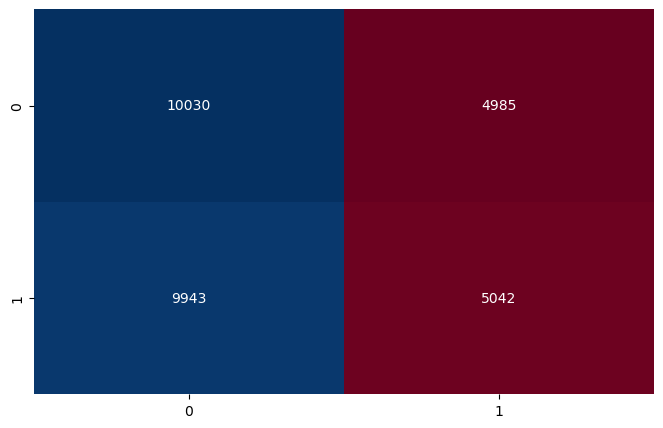

In [88]:
rf2 = RandomForestClassifier(max_depth=12, max_leaf_nodes=80, min_samples_leaf=15,
                       min_samples_split=20, n_estimators=200)
eval_model(rf2,x_train,x_test,y_train,y_test)

In [89]:
update_score_card(model_name = 'Random Forest with Pruning')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.501040,0.337538,0.403349
1,Logistic Regression using SGD,0.50,0.5,0.499500,1.000000,0.666222
2,Decision Tree Classifier,1.00,0.5,0.496732,0.492025,0.494368
3,Decision Tree with Pruning,0.52,0.5,0.502510,0.594595,0.544688
4,Random Forest,1.00,0.5,0.501929,0.477477,0.489398
5,Random Forest with Pruning,0.59,0.5,0.502842,0.336470,0.403166


In [90]:
# Ensemble Learning

In [91]:
# Bagging Classifier


Training Score is: 98.0 %
Testing Score is: 50.0 %

precision Score is: 0.4969
Recall Score is: 0.3897
F1 Score is: 0.4368

Confusion Matrix is
 [[9103 5912]
 [9145 5840]]

Predictions:
 [1 1 0 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.50      0.61      0.55     15015
           1       0.50      0.39      0.44     14985

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



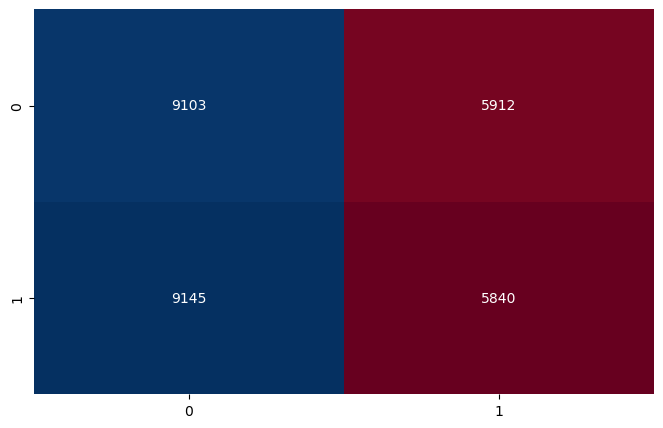

In [92]:
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(bag,x_train,x_test,y_train,y_test)

In [93]:
update_score_card(model_name = 'Bagging Ensemble')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.501040,0.337538,0.403349
1,Logistic Regression using SGD,0.50,0.5,0.499500,1.000000,0.666222
2,Decision Tree Classifier,1.00,0.5,0.496732,0.492025,0.494368
3,Decision Tree with Pruning,0.52,0.5,0.502510,0.594595,0.544688
4,Random Forest,1.00,0.5,0.501929,0.477477,0.489398
5,Random Forest with Pruning,0.59,0.5,0.502842,0.336470,0.403166
6,Bagging Ensemble,0.98,0.5,0.496937,0.389723,0.436848


In [94]:
# AdaBoost Classifier


Training Score is: 100.0 %
Testing Score is: 50.0 %

precision Score is: 0.5017
Recall Score is: 0.4937
F1 Score is: 0.4976

Confusion Matrix is
 [[7666 7349]
 [7587 7398]]

Predictions:
 [0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     15015
           1       0.50      0.49      0.50     14985

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



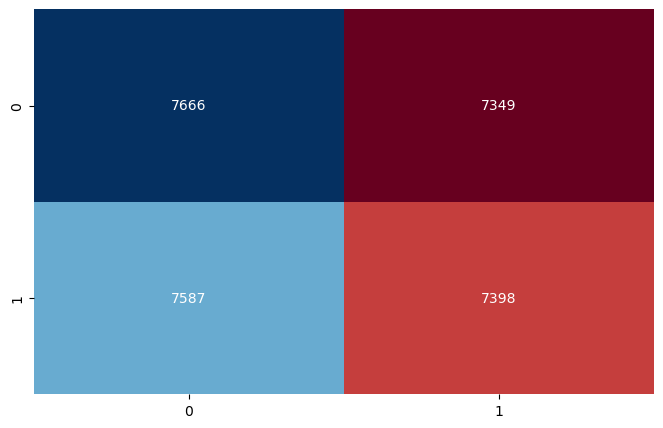

In [95]:
adaboost = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(adaboost,x_train,x_test,y_train,y_test)

In [96]:
update_score_card(model_name = 'Adaboost Ensemble')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.501040,0.337538,0.403349
1,Logistic Regression using SGD,0.50,0.5,0.499500,1.000000,0.666222
2,Decision Tree Classifier,1.00,0.5,0.496732,0.492025,0.494368
3,Decision Tree with Pruning,0.52,0.5,0.502510,0.594595,0.544688
4,Random Forest,1.00,0.5,0.501929,0.477477,0.489398
5,Random Forest with Pruning,0.59,0.5,0.502842,0.336470,0.403166
6,Bagging Ensemble,0.98,0.5,0.496937,0.389723,0.436848
7,Adaboost Ensemble,1.00,0.5,0.501661,0.493694,0.497646


In [97]:
# XGBoost Classifier


Training Score is: 54.0 %
Testing Score is: 50.0 %

precision Score is: 0.4981
Recall Score is: 0.3255
F1 Score is: 0.3937

Confusion Matrix is
 [[10100  4915]
 [10107  4878]]

Predictions:
 [1 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.50      0.67      0.57     15015
           1       0.50      0.33      0.39     14985

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.48     30000
weighted avg       0.50      0.50      0.48     30000



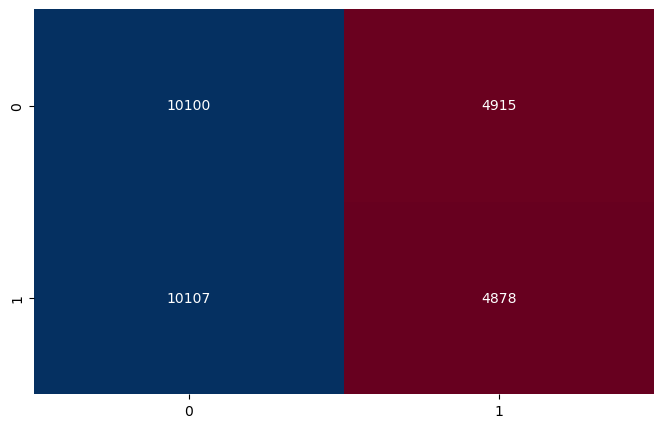

In [98]:
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
eval_model(xgbm,x_train,x_test,y_train,y_test)

In [99]:
update_score_card(model_name = 'XG Boost Ensemble')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.501040,0.337538,0.403349
1,Logistic Regression using SGD,0.50,0.5,0.499500,1.000000,0.666222
2,Decision Tree Classifier,1.00,0.5,0.496732,0.492025,0.494368
3,Decision Tree with Pruning,0.52,0.5,0.502510,0.594595,0.544688
4,Random Forest,1.00,0.5,0.501929,0.477477,0.489398
5,Random Forest with Pruning,0.59,0.5,0.502842,0.336470,0.403166
6,Bagging Ensemble,0.98,0.5,0.496937,0.389723,0.436848
7,Adaboost Ensemble,1.00,0.5,0.501661,0.493694,0.497646
8,XG Boost Ensemble,0.54,0.5,0.498111,0.325526,0.393736


In [100]:
# Naive Bayes Classifier


Training Score is: 51.0 %
Testing Score is: 50.0 %

precision Score is: 0.5033
Recall Score is: 0.4105
F1 Score is: 0.4522

Confusion Matrix is
 [[8943 6072]
 [8833 6152]]

Predictions:
 [1 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.50      0.60      0.55     15015
           1       0.50      0.41      0.45     14985

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



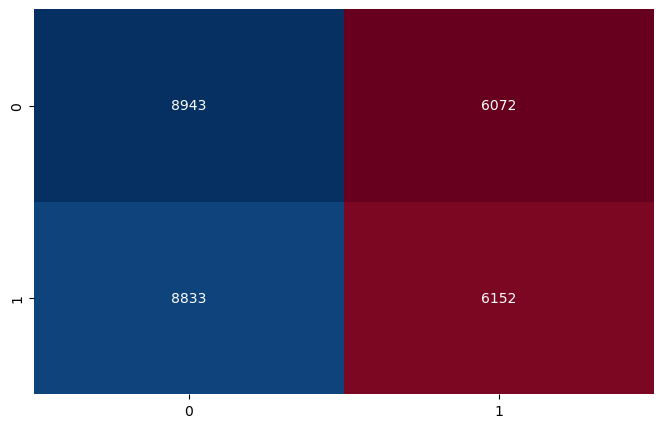

In [101]:
gnb = GaussianNB()
eval_model(gnb,x_train,x_test,y_train,y_test)

In [102]:
update_score_card(model_name = 'Naive Bayes Classifier')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.501040,0.337538,0.403349
1,Logistic Regression using SGD,0.50,0.5,0.499500,1.000000,0.666222
2,Decision Tree Classifier,1.00,0.5,0.496732,0.492025,0.494368
3,Decision Tree with Pruning,0.52,0.5,0.502510,0.594595,0.544688
4,Random Forest,1.00,0.5,0.501929,0.477477,0.489398
5,Random Forest with Pruning,0.59,0.5,0.502842,0.336470,0.403166
6,Bagging Ensemble,0.98,0.5,0.496937,0.389723,0.436848
7,Adaboost Ensemble,1.00,0.5,0.501661,0.493694,0.497646
8,XG Boost Ensemble,0.54,0.5,0.498111,0.325526,0.393736
9,Naive Bayes Classifier,0.51,0.5,0.503272,0.410544,0.452203


In [103]:
# KNN Classifier


Training Score is: 64.0 %
Testing Score is: 50.0 %

precision Score is: 0.4976
Recall Score is: 0.4908
F1 Score is: 0.4942

Confusion Matrix is
 [[7590 7425]
 [7630 7355]]

Predictions:
 [1 1 1 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.50      0.51      0.50     15015
           1       0.50      0.49      0.49     14985

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



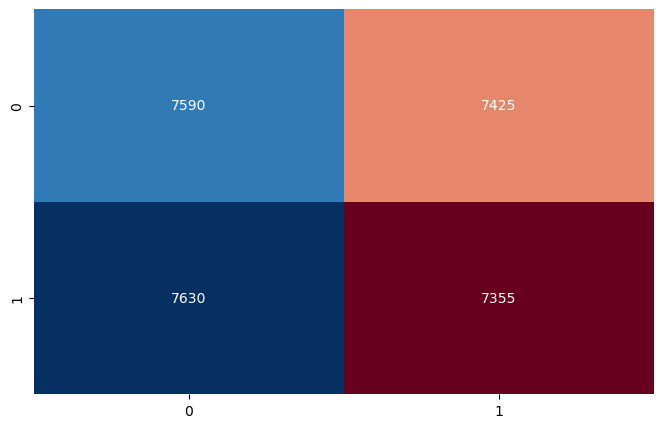

In [104]:
knn1 = KNeighborsClassifier(n_neighbors=9)
eval_model(knn1,x_train,x_test,y_train,y_test)

In [105]:
update_score_card(model_name = 'KNN')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.501040,0.337538,0.403349
1,Logistic Regression using SGD,0.50,0.5,0.499500,1.000000,0.666222
2,Decision Tree Classifier,1.00,0.5,0.496732,0.492025,0.494368
3,Decision Tree with Pruning,0.52,0.5,0.502510,0.594595,0.544688
4,Random Forest,1.00,0.5,0.501929,0.477477,0.489398
5,Random Forest with Pruning,0.59,0.5,0.502842,0.336470,0.403166
6,Bagging Ensemble,0.98,0.5,0.496937,0.389723,0.436848
7,Adaboost Ensemble,1.00,0.5,0.501661,0.493694,0.497646
8,XG Boost Ensemble,0.54,0.5,0.498111,0.325526,0.393736
9,Naive Bayes Classifier,0.51,0.5,0.503272,0.410544,0.452203


In [106]:
# To find optimal number of neighbors for KNN

In [107]:
neighbors = list(range(3,30,2))
knn_acc = []
for i in neighbors:
    m = KNeighborsClassifier(n_neighbors=i)
    m.fit(x_train,y_train)
    ypred = m.predict(x_test)
    knn_acc.append(accuracy_score(y_test,ypred))

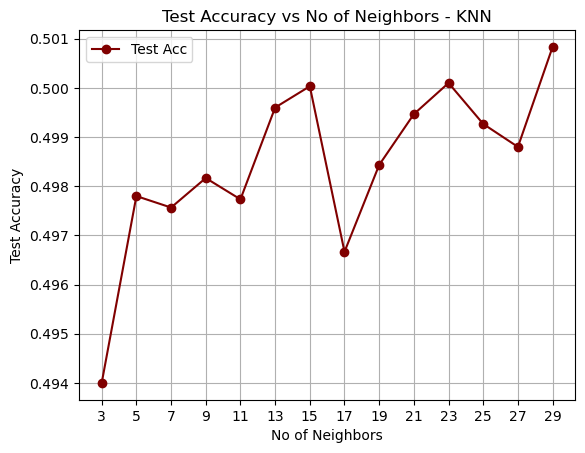

In [108]:
plt.plot(neighbors,knn_acc,color='maroon',label='Test Acc',marker='o')
plt.title('Test Accuracy vs No of Neighbors - KNN')
plt.xlabel('No of Neighbors')
plt.ylabel('Test Accuracy')
plt.xticks(neighbors)
plt.legend()
plt.grid()
plt.show()


Training Score is: 57.99999999999999 %
Testing Score is: 50.0 %

precision Score is: 0.5003
Recall Score is: 0.4916
F1 Score is: 0.4959

Confusion Matrix is
 [[7658 7357]
 [7618 7367]]

Predictions:
 [1 0 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     15015
           1       0.50      0.49      0.50     14985

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



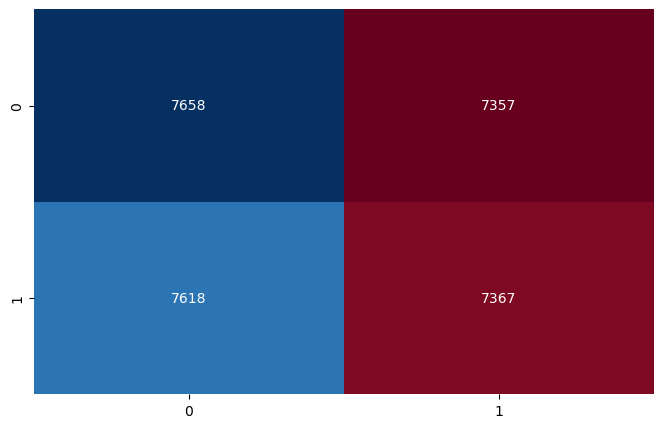

In [109]:
knn2 = KNeighborsClassifier(n_neighbors=29)
eval_model(knn2,x_train,x_test,y_train,y_test)

In [110]:
update_score_card(model_name = 'KNN with tuned parameters')

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.501040,0.337538,0.403349
1,Logistic Regression using SGD,0.50,0.5,0.499500,1.000000,0.666222
2,Decision Tree Classifier,1.00,0.5,0.496732,0.492025,0.494368
3,Decision Tree with Pruning,0.52,0.5,0.502510,0.594595,0.544688
4,Random Forest,1.00,0.5,0.501929,0.477477,0.489398
5,Random Forest with Pruning,0.59,0.5,0.502842,0.336470,0.403166
6,Bagging Ensemble,0.98,0.5,0.496937,0.389723,0.436848
7,Adaboost Ensemble,1.00,0.5,0.501661,0.493694,0.497646
8,XG Boost Ensemble,0.54,0.5,0.498111,0.325526,0.393736
9,Naive Bayes Classifier,0.51,0.5,0.503272,0.410544,0.452203


In [111]:
# Model Comparision

In [112]:
score_card

,Model,Train Score,Test Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.51,0.5,0.501040,0.337538,0.403349
1,Logistic Regression using SGD,0.50,0.5,0.499500,1.000000,0.666222
2,Decision Tree Classifier,1.00,0.5,0.496732,0.492025,0.494368
3,Decision Tree with Pruning,0.52,0.5,0.502510,0.594595,0.544688
4,Random Forest,1.00,0.5,0.501929,0.477477,0.489398
5,Random Forest with Pruning,0.59,0.5,0.502842,0.336470,0.403166
6,Bagging Ensemble,0.98,0.5,0.496937,0.389723,0.436848
7,Adaboost Ensemble,1.00,0.5,0.501661,0.493694,0.497646
8,XG Boost Ensemble,0.54,0.5,0.498111,0.325526,0.393736
9,Naive Bayes Classifier,0.51,0.5,0.503272,0.410544,0.452203


In [113]:
score_card['f1-score'].idxmax()

1

In [114]:
print (score_card['Model'][score_card['f1-score'].idxmax()], "is the best performing model")

Logistic Regression using SGD is the best performing model


In [115]:
# Saving the Model
import pickle
pickle.dump(lr_SGD,open('Final model.pkl','wb'))